In [2]:
import pandas as pd
df = pd.read_csv("C:/Users/kazis/Desktop/CBU/BA Sem 4/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

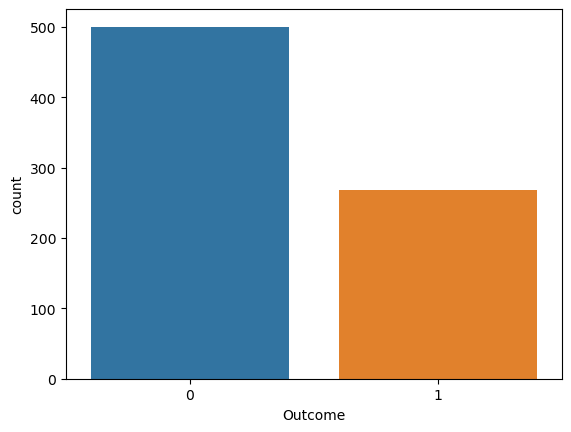

Model: Logistic Regression
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154

Model: Decision Tree
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        99
           1       0.65      0.73      0.68        55

    accuracy                           0.76       154
   macro avg       0.74      0.75      0.75       154
weighted avg       0.77      0.76      0.76       154

Model: Random Forest
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weigh

C:\Users\kazis\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [7]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# EDA
print(df.describe())
sns.countplot(x='Outcome', data=df)
plt.show()

# Preprocessing
features = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
target = df['Outcome']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

# Decision Tree
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_predictions = tree_model.predict(X_test)

# Random Forest
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)
forest_predictions = forest_model.predict(X_test)
# Support Vector Machine
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

# Gradient Boosting
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

# Neural Network
nn_model = MLPClassifier()
nn_model.fit(X_train, y_train)
nn_predictions = nn_model.predict(X_test)

# Define a list of models
models = [model, tree_model, forest_model, svm_model, gb_model, nn_model]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'Gradient Boosting', 'Neural Network']

# For each model, print the classification report
for i, model in enumerate(models):
    print(f"Model: {model_names[i]}")
    predictions = model.predict(X_test)
    print(classification_report(y_test, predictions))

In [8]:
'''
Conclusion¶
Based on the classification reports for the six models, here are some conclusions:

1. Logistic Regression: This model has an accuracy of 75%. It performs slightly better in predicting class 0 
(non-diabetic) with a precision of 81% compared to class 1 (diabetic) with a precision of 65%.

2. Decision Tree: This model has the highest accuracy of 77%. It performs significantly better in predicting class 0 
with a precision of 85%, but its performance drops to 65% precision for class 1.

3. Random Forest: This model has an accuracy of 74%. Similar to Logistic Regression, it performs better in predicting
class 0 with a precision of 81%.

4. Support Vector Machine (SVM): This model has an accuracy of 73%. It has a precision of 77% for class 0 and 65% for 
class 1.

5. Gradient Boosting: This model has an accuracy of 74%, with a precision of 81% for class 0 and 63% for class 1.

6. Neural Network: This model has an accuracy of 75%. It has a balanced precision of 81% for class 0 and 65% for class 1.

In summary, all models have similar performance with accuracy ranging from 73% to 77%. The Decision Tree model 
has the highest accuracy, but it also has the largest discrepancy between the precision of class 0 and class 1. 
On the other hand, the Neural Network model has a balanced precision for both classes. Therefore, the choice of model 
may depend on the specific requirements of your task. For instance, if you want to minimize false negatives for the 
diabetic class (class 1), you might prefer a model with higher recall for that class. If overall accuracy is the priority, 
the Decision Tree model would be the best choice based on these results.
'''

''